# Data Analytics and Data Driven Decisions Project

##### Kainat Khowaja (254899)
##### Victoria Damilola Tomori (254986)
##### Collins Boateng (255088)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as st
from pandas import Series, DataFrame
from string import ascii_letters


Importing data

In [62]:
Jan2017= pd.read_csv('Jan2017.csv', sep=",")
Feb2017= pd.read_csv('Feb2017.csv', sep=",")
Mar2017= pd.read_csv('Mar2017.csv', sep=",")
April2017= pd.read_csv('April2017.csv', sep=",")
May2017= pd.read_csv('May2017.csv', sep=",")
June2017= pd.read_csv('June2017.csv', sep=",")
July2017= pd.read_csv('July2017.csv', sep=",")

Combining the datasets from year 2017 into one dataframe. 

In [63]:
df=pd.concat([Jan2017,Feb2017,Mar2017,April2017,May2017,June2017,July2017])
df.head()

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,longitude,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,room_type,survey_id
0,6,NaN,1.0,NaN,NaN,NaN,104792431,2017-01-17 09:13:58.115597,41.905526,NaN,12.501460,NaN,I Municipio,0.0,55.0,0,16662199,Shared room,NaN
1,7,NaN,1.0,NaN,NaN,NaN,2671558,2017-01-17 09:13:56.680281,41.866231,NaN,12.546279,NaN,VI Municipio,4.0,39.0,10,1051382,Shared room,NaN
2,2,NaN,1.0,NaN,NaN,NaN,5441562,2017-01-17 09:13:49.332245,41.888952,NaN,12.526231,NaN,VI Municipio,0.0,81.0,0,990775,Shared room,NaN
3,2,NaN,1.0,NaN,NaN,NaN,30306692,2017-01-17 09:13:45.145694,41.894871,NaN,12.490764,NaN,I Municipio,0.0,57.0,1,14614294,Shared room,NaN
4,4,NaN,1.0,NaN,NaN,NaN,63462664,2017-01-17 09:13:45.139897,41.866081,NaN,12.465636,NaN,XV Municipio,5.0,48.0,17,12984735,Shared room,NaN


Now, after combining, we check how many number of rows and columns we have in total. It shows we have around 280693 instances in total with 19 columns. 

In [64]:
df.shape

(180693, 19)

# Cleaning dataset

Checking if dataset has missing values

In [65]:
df.isnull().any().any()

True

The above command tells us that there are NaN value in the DataFrame. Now to see how many missing values we have in each column, we execute the following command. 

In [66]:
nullcol=df.columns[df.isnull().any()]
df[nullcol].isnull().sum()

bathrooms    180693
borough      180693
city          75931
country      180693
location      75931
minstay      180693
survey_id     75931
dtype: int64

From the above result, we observe that the attributes bathrooms, borough, country and minstay have missing values for the entire dataset, and therefore, their presence hold no significance in our analysis. For that reason, we can eliminate them from our dataset. 

For the variables city and survey_id, even though only partial number of values are missing, but we also eliminate them from our dataset because the variable city is constant (Rome) for all the observations and the survey_id does not play any role in our analysis. 

In [67]:
df.drop(columns=['bathrooms','borough','country','minstay','city','survey_id'], inplace=True)

Now to deal with the column "location" which have partial number of missing values, we introduce 0 instead of NaN so that we do not have any more missing values in our dataset. 

In [68]:
df=df.fillna(0)

df

,accommodates,bedrooms,host_id,last_modified,latitude,location,longitude,neighborhood,overall_satisfaction,price,reviews,room_id,room_type
0,6,1.0,104792431,2017-01-17 09:13:58.115597,41.905526,0,12.501460,I Municipio,0.0,55.0,0,16662199,Shared room
1,7,1.0,2671558,2017-01-17 09:13:56.680281,41.866231,0,12.546279,VI Municipio,4.0,39.0,10,1051382,Shared room
2,2,1.0,5441562,2017-01-17 09:13:49.332245,41.888952,0,12.526231,VI Municipio,0.0,81.0,0,990775,Shared room
3,2,1.0,30306692,2017-01-17 09:13:45.145694,41.894871,0,12.490764,I Municipio,0.0,57.0,1,14614294,Shared room
4,4,1.0,63462664,2017-01-17 09:13:45.139897,41.866081,0,12.465636,XV Municipio,5.0,48.0,17,12984735,Shared room
5,4,1.0,84534877,2017-01-17 09:13:45.137192,41.897371,0,12.510003,I Municipio,5.0,43.0,14,14682516,Shared room
6,2,1.0,25272699,2017-01-17 09:13:45.135187,41.896764,0,12.503796,I Municipio,0.0,56.0,1,13446634,Shared room
7,6,1.0,4064206,2017-01-17 09:13:45.128467,41.899453,0,12.502287,I Municipio,4.0,44.0,121,1218665,Shared room
8,3,1.0,3593653,2017-01-17 09:13:45.124235,41.882357,0,12.509523,IX Municipio,0.0,56.0,1,15260559,Shared room
9,7,1.0,2671558,2017-01-17 09:13:44.267756,41.868119,0,12.547220,VI Municipio,4.0,33.0,46,574545,Shared room


In [69]:
#to check that there are no missing values left in the dataset
df.isnull().any().any()

False

# Descriptive Statistics

## Summary Statistics

Since our data has categorical variables, it is imperative to describe the variables based on the corresponding categories of other attributes. For the first part, we describe the continous variables of an airbnb house based on the neighborhood located and secondly, we descirbe it based on the type of the rooms it is offering.  

In [124]:
summary0=df.groupby("neighborhood")['bedrooms','price','accommodates','reviews','overall_satisfaction'].describe()
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
summary0

bedrooms                                                  price                                                            accommodates                                                reviews                                                     overall_satisfaction                                             
                   count      mean       std  min  25%  50%  75%   max    count        mean         std   min   25%    50%     75%     max        count      mean       std  min  25%  50%  75%   max    count       mean        std  min  25%   50%    75%    max                count      mean       std  min  25%  50%  75%  max
neighborhood                                                                                                                                                                                                                                                                                                                        
I Municipio      67382.0  1.437090  0.866240  0.0  1.0  1.0  2.0  10.0  67382.0  128.814683  114.779978  10.0  73.0  102.0  146.00  3526.0      67382.0  3.980039  2.130645  1.0  2.0  4.0  5.0  16.0  67382.0  30.545383  45.162855  0.0  1.0  11.0  43.00  453.0              67382.0  3.128833  2.183913  0.0  0.0  4.5  5.0  5.0
II Municipio      8408.0  1.504876  0.911695  0.0  1.0  1.0  2.0  10.0   8408.0  100.177688   94.691369  14.0  55.0   78.0  109.00  1781.0       8408.0  3.598716  1.950502  1.0  2.0  3.0  4.0  16.0   8408.0  13.147241  25.846063  0.0  0.0   2.0  13.00  316.0               8408.0  2.261358  2.359289  0.0  0.0  0.0  4.5  5.0
III Municipio     6427.0  1.298117  0.689480  0.0  1.0  1.0  2.0   6.0   6427.0   72.015404   53.826723  10.0  45.0   61.0   83.00   983.0       6427.0  3.268088  1.920335  1.0  2.0  3.0  4.0  16.0   6427.0  25.096779  39.103472  0.0  0.0   7.0  34.00  261.0               6427.0  2.804886  2.263196  0.0  0.0  4.5  4.5  5.0
IV Municipio      3146.0  1.370312  0.827506  0.0  1.0  1.0  2.0   8.0   3146.0   70.733312  105.102084  10.0  39.0   55.0   75.75  2030.0       3146.0  3.324857  1.993630  1.0  2.0  3.0  4.0  16.0   3146.0   9.188175  20.158376  0.0  0.0   1.0   8.00  198.0               3146.0  1.859663  2.309123  0.0  0.0  0.0  4.5  5.0
IX Municipio     12706.0  1.373760  0.747027  0.0  1.0  1.0  2.0   8.0  12706.0   68.577365   41.546409  10.0  44.0   60.0   81.00   754.0      12706.0  3.474264  1.997954  1.0  2.0  3.0  4.0  16.0  12706.0  21.203762  37.247052  0.0  0.0   5.0  26.00  358.0              12706.0  2.712892  2.330945  0.0  0.0  4.5  5.0  5.0
V Municipio       3387.0  1.443756  1.143310  0.0  1.0  1.0  2.0  10.0   3387.0   70.186301   97.481931  12.0  35.0   50.0   74.00  1191.0       3387.0  3.476823  2.480219  1.0  2.0  3.0  4.0  16.0   3387.0  14.886035  34.149795  0.0  0.0   2.0  11.00  282.0               3387.0  2.039858  2.322533  0.0  0.0  0.0  4.5  5.0
VI Municipio      6307.0  1.152212  0.529479  0.0  1.0  1.0  1.0   5.0   6307.0   51.542730   39.423364  11.0  34.0   46.0   60.00   950.0       6307.0  2.867290  1.394448  1.0  2.0  2.0  4.0  13.0   6307.0  22.781830  35.640997  0.0  1.0   7.0  32.00  289.0               6307.0  2.898208  2.256528  0.0  0.0  4.5  4.5  5.0
VII Municipio     1313.0  1.221630  0.603916  0.0  1.0  1.0  1.0   4.0   1313.0   51.581874   44.662824  10.0  32.0   42.0   56.00   464.0       1313.0  3.097487  1.604947  1.0  2.0  3.0  4.0  12.0   1313.0  13.659558  23.606673  0.0  0.0   2.0  14.00  136.0               1313.0  2.272277  2.302390  0.0  0.0  0.0  4.5  5.0
VIII Municipio    1321.0  1.293717  0.696331  0.0  1.0  1.0  1.0   9.0   1321.0   56.396669   70.668486  12.0  31.0   44.0   62.00   950.0       1321.0  3.063588  1.806272  1.0  2.0  2.0  4.0  16.0   1321.0   5.588191  14.989187  0.0  0.0   1.0   3.00  108.0               1321.0  1.406889  2.165422  0.0  0.0  0.0  4.5  5.0
X Municipio       3264.0  1.336397  0.725744  0.0  1.0  1.0  2.0   7.0   3264.0   65.107230   61.808902  10.0  38.0 

The grouping by neighborhood provides us some valuable insight into our data. For example, it can be observed that even though the number of bedrooms in houses of each neighborhood are more or less equal on average, the price in Municipo I is relatively higher than others, one reason being that it is close to the city center.

In [125]:
summary1=df.groupby("room_type")['bedrooms','price','accommodates','reviews','overall_satisfaction'].describe()
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
summary1

bedrooms                                                   price                                                          accommodates                                                 reviews                                                   overall_satisfaction                                             
                    count      mean       std  min  25%  50%  75%   max     count        mean         std   min   25%   50%    75%     max        count      mean       std  min  25%  50%  75%   max     count       mean        std  min  25%  50%   75%    max                count      mean       std  min  25%  50%  75%  max
room_type                                                                                                                                                                                                                                                                                                                          
Entire home/apt  111134.0  1.667060  0.976559  0.0  1.0  2.0  2.0  10.0  111134.0  121.863678  125.771532  10.0  68.0  94.0  135.0  5937.0     111134.0  4.597909  2.135617  1.0  3.0  4.0  6.0  16.0  111134.0  25.410360  39.231080  0.0  1.0  8.0  34.0  416.0             111134.0  3.036537  2.237791  0.0  0.0  4.5  5.0  5.0
Private room      68403.0  1.031709  0.315951  0.0  1.0  1.0  1.0  10.0   68403.0   66.177288   41.391948  10.0  40.0  57.0   81.0   510.0      68403.0  2.393126  1.191972  1.0  2.0  2.0  3.0  16.0   68403.0  15.972574  33.434867  0.0  0.0  2.0  15.0  453.0              68403.0  2.105090  2.319111  0.0  0.0  0.0  4.5  5.0
Shared room        1156.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0    1156.0   39.548443   46.075115  10.0  20.0  28.0   38.0   417.0       1156.0  2.910035  2.386587  1.0  1.0  2.0  4.0  16.0    1156.0  14.866782  33.215882  0.0  0.0  2.0  11.0  209.0               1156.0  2.175606  2.261450  0.0  0.0  0.0  4.5  5.0

The grouping by room type sheds light on the fact that entire apartments are usually costlier than the private or shared rooms, but at the same time, the overall satisfaction for the entire apartments is higher.  

## Histograms

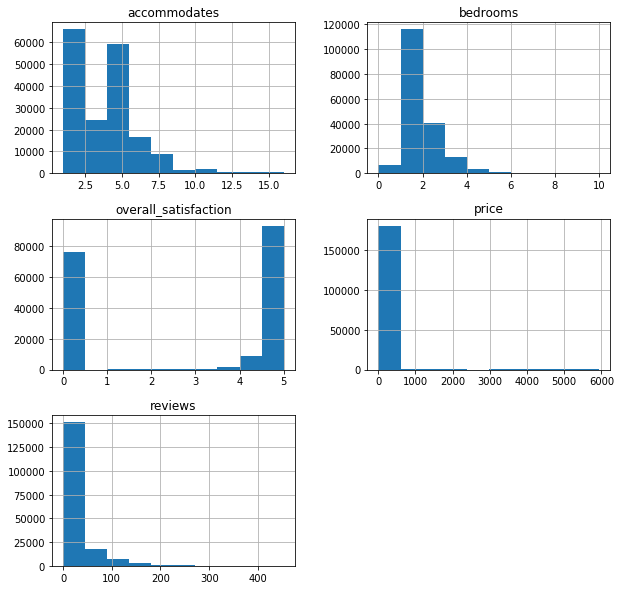

In [72]:
df.hist(column=['bedrooms','price','accommodates','reviews','overall_satisfaction'], figsize=(10,10));


From the histograms, a few important observations can be made: 
1. The price per night for most of the rooms are below 1000, and only a few rooms have a higher price.
2. Usually people tend to mark overall satisfaction of an apartment on extremes: it is either 4 or 5 stars, or 0 or 1 star. This might be interesting to the people studying human behavior. 

## Pie Charts

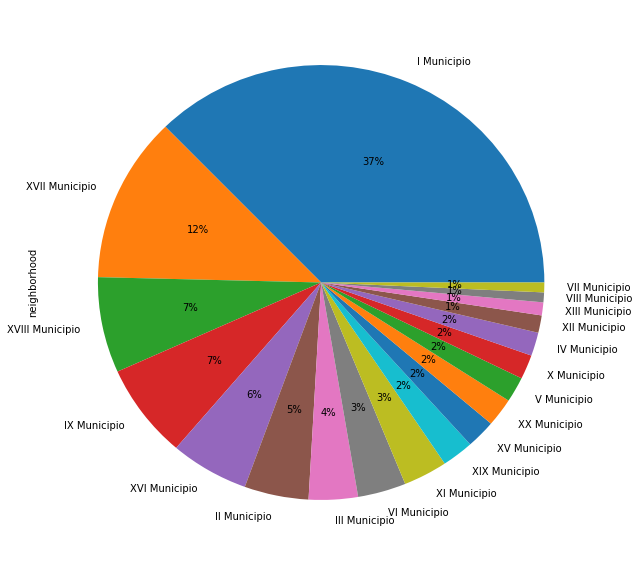

In [73]:
df.neighborhood.value_counts().plot(kind='pie',figsize=(10,10),autopct='%1.0f%%')

The above chart shows us that most of the houses of Airbnb in our dataset are located in Municipio I, while very small number of them are located in Municipio VII, VIII and XIII.

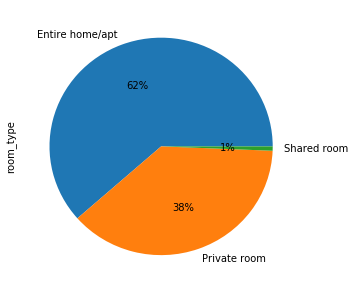

In [74]:
df.room_type.value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.0f%%')

The above plot shows that most of the Airbnb houses are entire apartments. The second largest category is private rooms and only 1% rooms are shared in nature. 

## Box Plots

Boxplots are a simple way to compare multiple datasets on the same graph. Through the following few commands, we develop boxplots to compare variables "accommodates", "price","reviews" and "overall satisfaction"

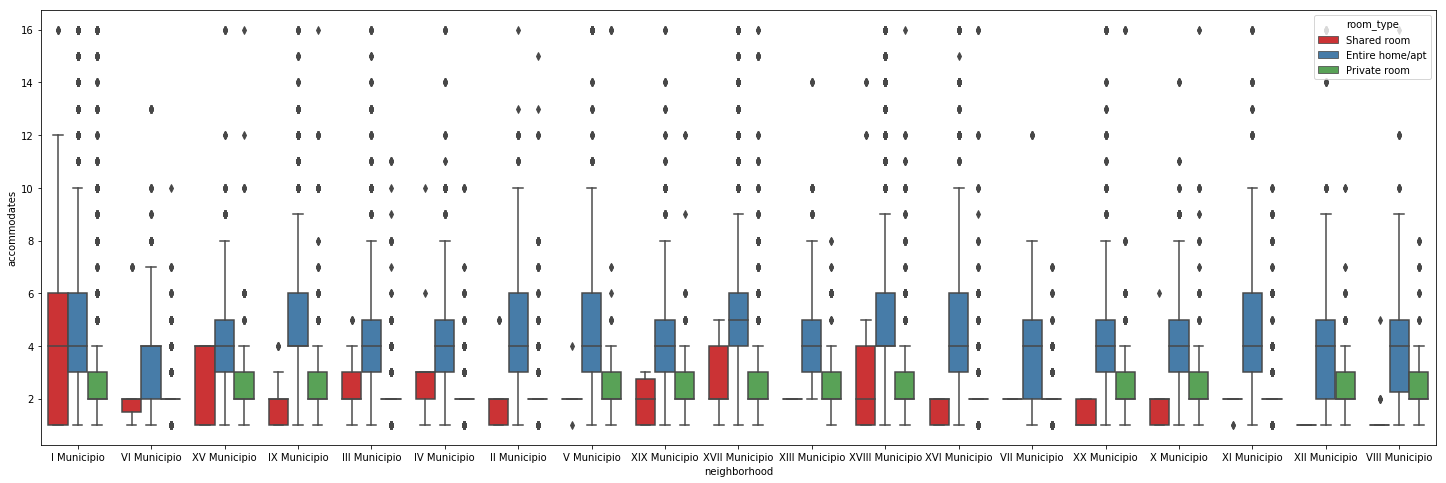

In [75]:
plt.figure(figsize=(25,8))
sns.boxplot(x="neighborhood", y="accommodates", hue="room_type", data=df, palette="Set1")

The box plot above shows that in almost all neighborhood, the shared and private houses accommodate lesser people than the entire apartments. The median number of people accommodated by entire apartment is around 4-5 in all the neighborhood. 

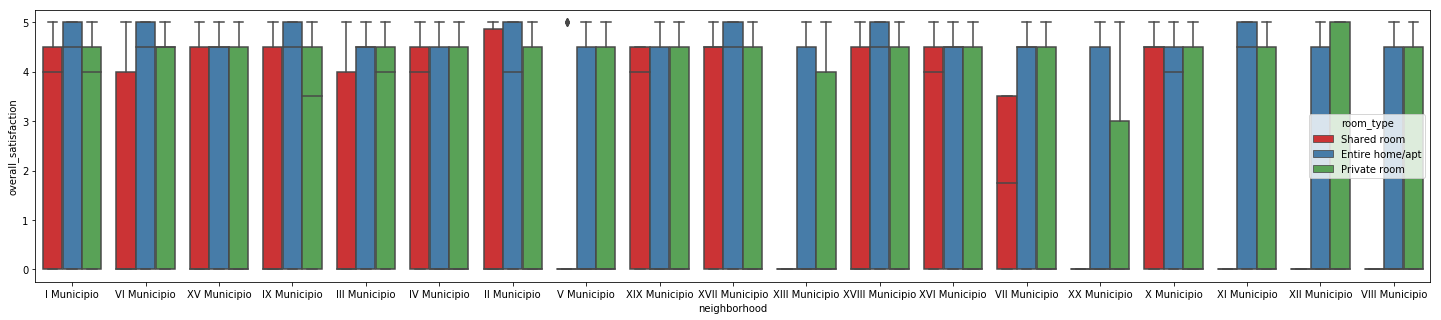

In [76]:
plt.figure(figsize=(25,5))
sns.boxplot(x="neighborhood", y="overall_satisfaction", hue="room_type", data=df, palette="Set1")

This boxplot further confirms our earlier observation that the overall satisfaction for the entire apartments is higher, irrespective of the neighborhood.

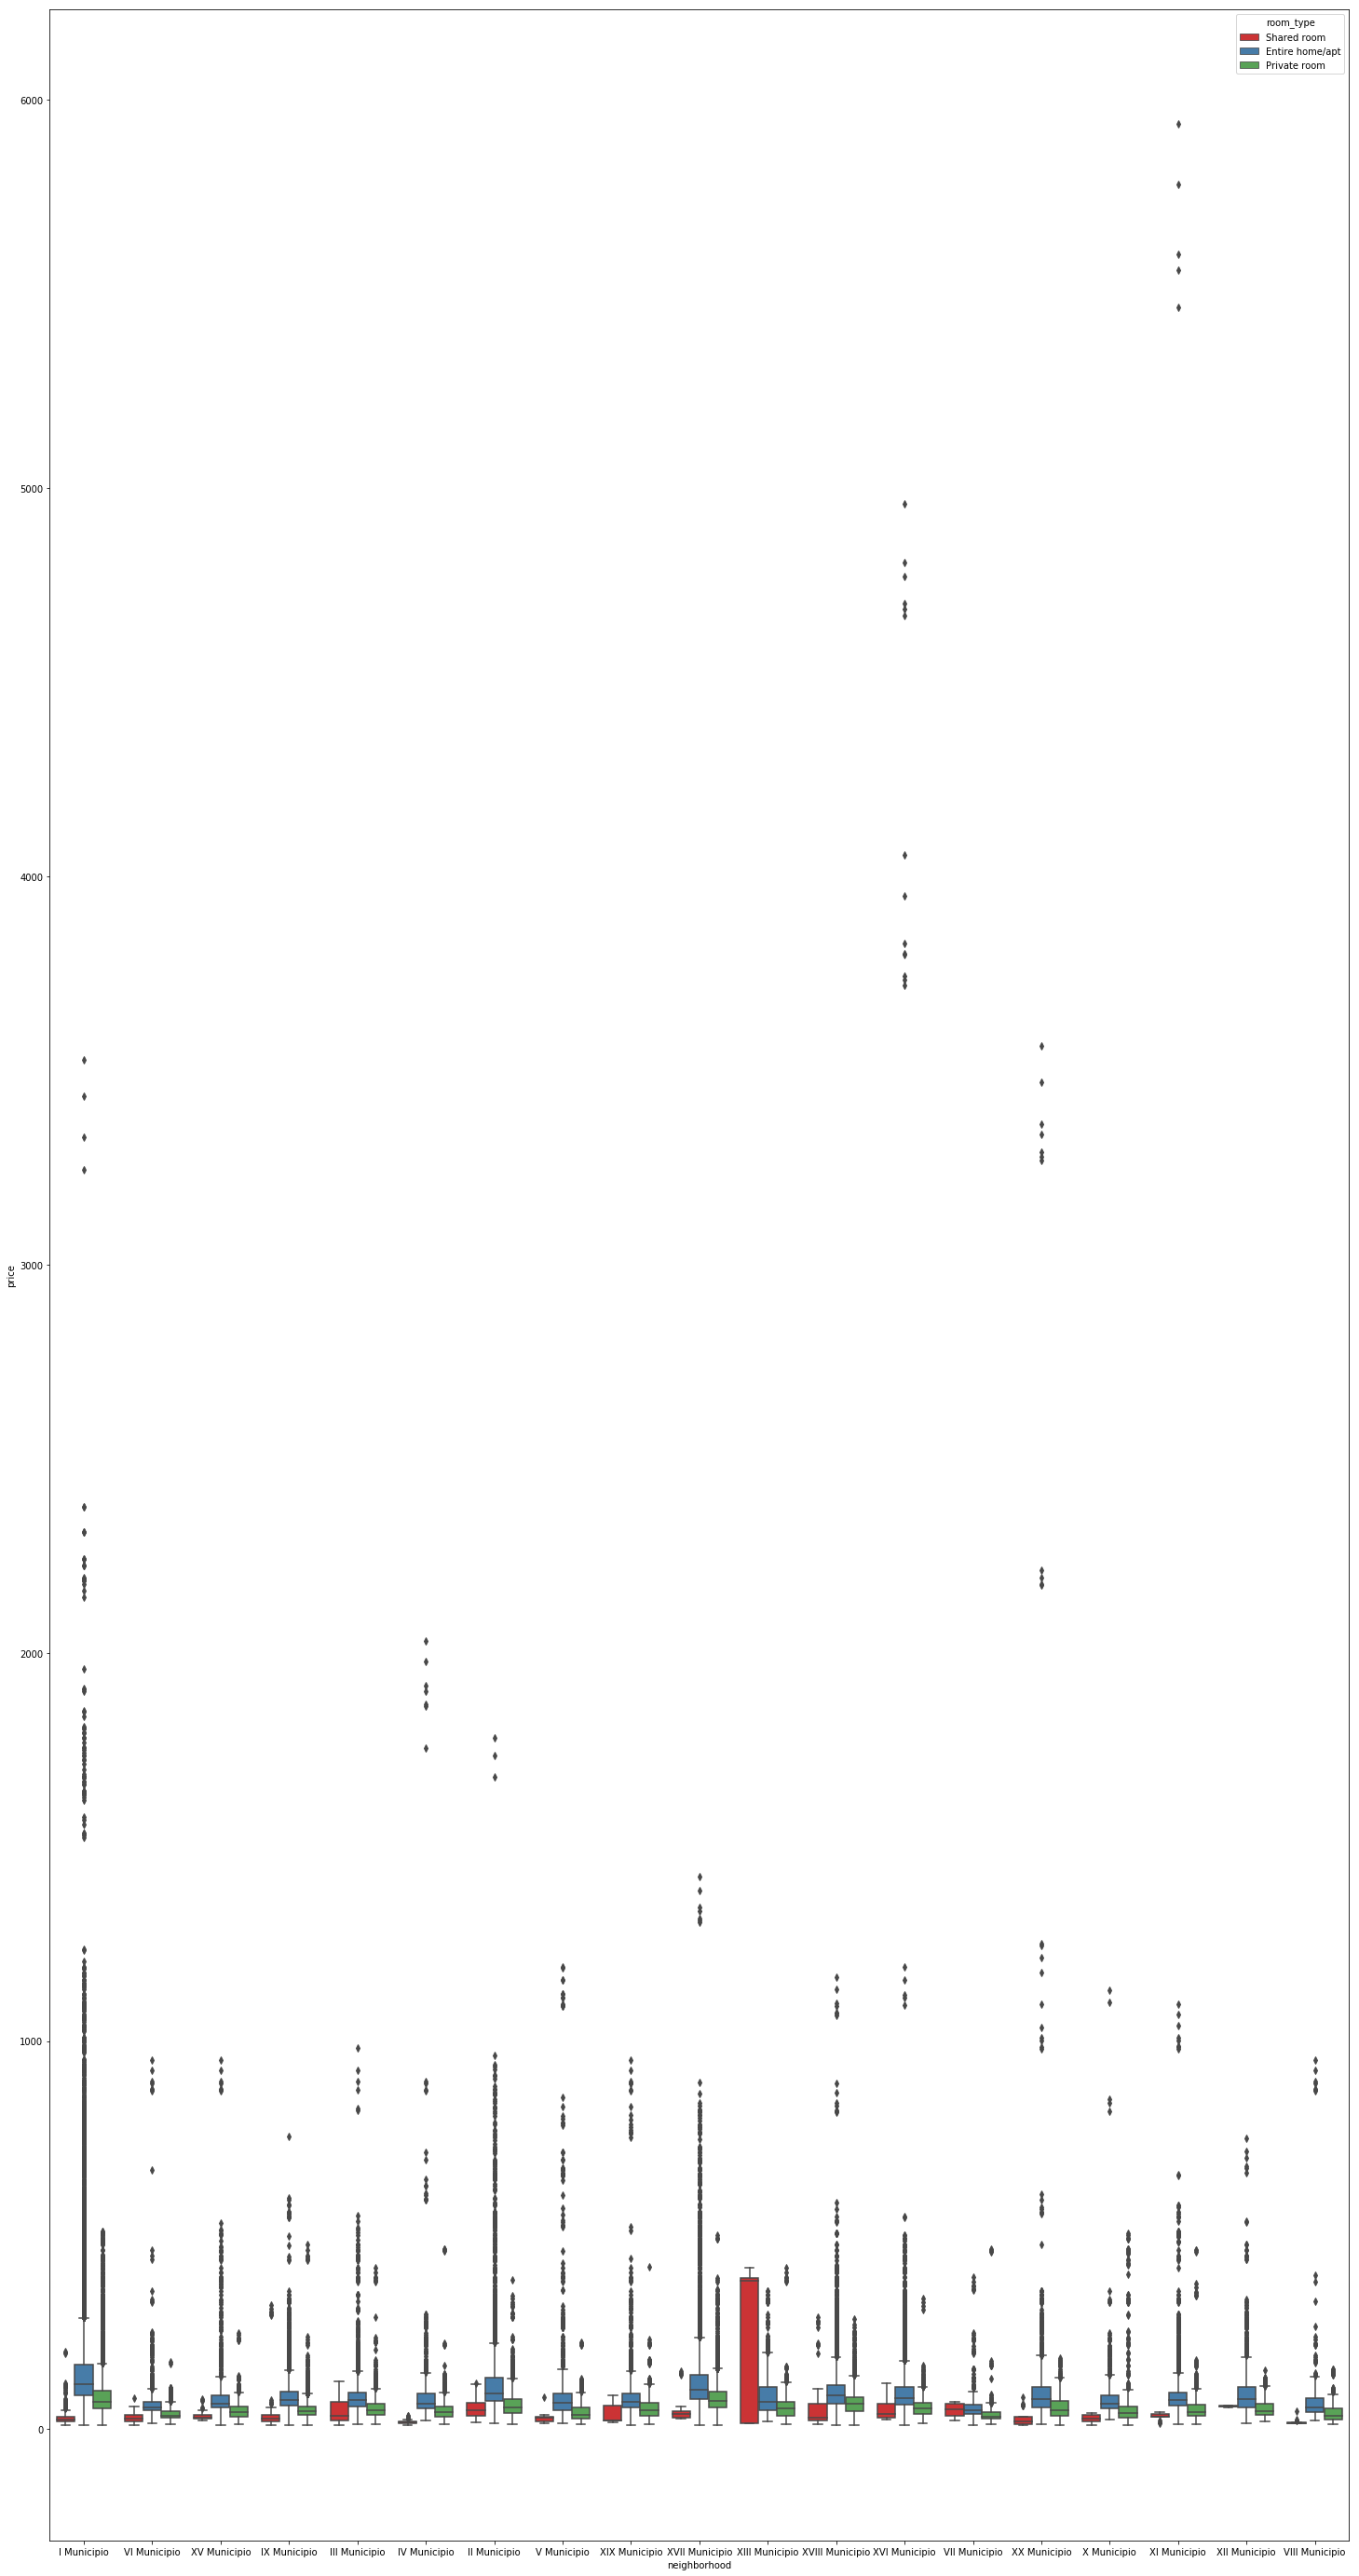

In [77]:
plt.figure(figsize=(25,50))
sns.boxplot(x="neighborhood", y="price", hue="room_type", data=df, palette="Set1")

The boxplot above shows that on general, entire apartments are expensive, which is only logical. It can also be seen that there are many outliers in Municipio I, which might be a reason behind the higher mean of its prices. There are also many outliers in Municipio XVI, XX and XI, indicating very high prices of private rooms and entire apartments, but one might expect these to be the prices associated with homes with many rooms.We can also notice some unordinary trends: The prices for shared rooms in Municipio XIII is oddly higher than the prices of entire apartments and private rooms.

## Correlation Matrix and Representation

In [78]:
#We make a new dataframe from the existing one containing only the quantitative variables. 
ndf=df[['accommodates','bedrooms','price','reviews','overall_satisfaction']].copy()

In [79]:
correlations=ndf.corr()
correlations

,accommodates,bedrooms,price,reviews,overall_satisfaction
accommodates,1.000000,0.751599,0.431412,0.008470,0.075002
bedrooms,0.751599,1.000000,0.432396,-0.042154,0.018960
price,0.431412,0.432396,1.000000,-0.079534,-0.086465
reviews,0.008470,-0.042154,-0.079534,1.000000,0.491244
overall_satisfaction,0.075002,0.018960,-0.086465,0.491244,1.000000


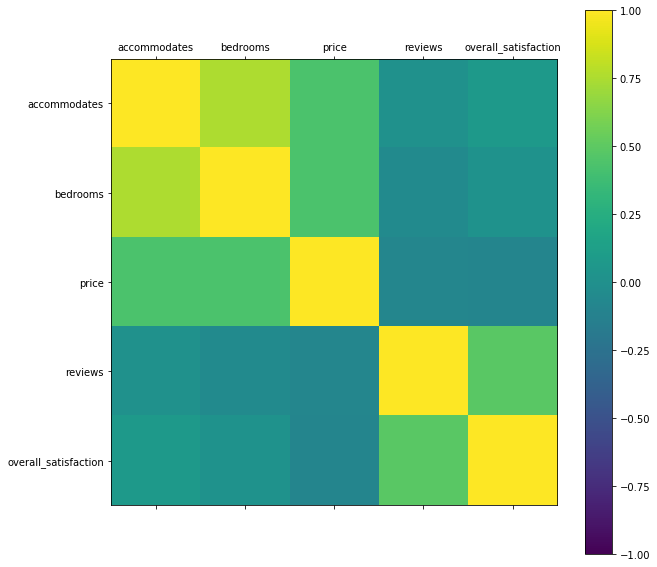

In [80]:
#Plot of correlation matrix
names = list(correlations.columns)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

The correlation matrix plays an important role in observing how the variables are interrelated. There are some obvious relationships such as:
1. High positive correlation between number of bedrooms and people accommodated; it is obvious that higher number of bedrooms can accommodate more people. 
2. Moderate positive correlation between number of bedrooms and price; bigger apartments are costly in general. 

There are also some interesting correlations that can be noticed:
1. Higher number of reviews are associated positively with overall satisfaction (it might be the case that people who are happy with the apartment are more inclined to post the review)
2. There is a negative correlation between the prices and overall satisfacation which can be justified using economics law of marginal utility. Same for price and reviews. 

# Unsupervised Learning

## Principle Component Analysis

Even though our new dataset is only 5-dimensional at the moment, it can be useful to identify patterns in the data to reduce the dimension while preserving the important information of the data. In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. First, we adopt a step by step approach to drive PCA and then we introduce a shortcut using R-studio codes. 

### Step by Step Approach
#### Storing our data as a matrix

In [81]:
X = ndf.iloc[:,0:5].values
X.shape

(180693, 5)

#### Standardizing Data
Since attributes of our dataset have different units, we transform the data onto unit scale (mean=0 and variance=1).

In [82]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 1.05679658, -0.49763074, -0.42875492, -0.58224693, -1.15760213],
       [ 1.52700006, -0.49763074, -0.58033722, -0.31479492,  0.57118054],
       [-0.82401733, -0.49763074, -0.18243368, -0.58224693, -1.15760213],
       ...,
       [ 0.11638963,  0.68082318, -0.17295979, -0.58224693, -1.15760213],
       [-0.35381385, -1.67608465, -0.17295979, -0.58224693, -1.15760213],
       [ 0.58659311,  0.68082318,  3.00079462, -0.58224693, -1.15760213]])

#### Covariance Matrix
The classic approach to PCA is to perform the eigendecomposition on the covariance matrix, which in our case is a 5×5 matrix where each element represents the covariance between two attributes

In [83]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000553  0.75160344  0.43141405  0.0084703   0.07500266]
 [ 0.75160344  1.00000553  0.43239805 -0.04215411  0.01896047]
 [ 0.43141405  0.43239805  1.00000553 -0.0795341  -0.08646554]
 [ 0.0084703  -0.04215411 -0.0795341   1.00000553  0.49124667]
 [ 0.07500266  0.01896047 -0.08646554  0.49124667  1.00000553]]


#### Eigendecomposition on Covariance Matrix

The eigenvectors and eigenvalues of a covariance matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [84]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.61374669 -0.1086534  -0.71034056  0.31453282 -0.08941388]
 [-0.6160548  -0.04937871  0.70230625  0.33528021 -0.11131638]
 [-0.48988136  0.09412427  0.01059517 -0.84589643  0.18842462]
 [ 0.0603175  -0.6934164   0.02265726 -0.26073877 -0.66860859]
 [ 0.01302072 -0.70432273  0.03945391  0.07162964  0.70503372]]

Eigenvalues 
[2.09635868 1.50810008 0.24603231 0.65101185 0.49852474]


#### Sorting Eigenvalues
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to sort the eigenvalues from highest to lowest in order to choose the top k eigenvectors.

In [85]:
# Make a list of (eigenvalue, eigenvector) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.096358679976344
1.5081000844535994
0.6510118530824714
0.49852474321071555
0.24603231067349798


#### Explained Variance

After sorting the eigenpairs, in order to select the number of principal components we need for our new feature subspace,we use “explained variance”. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [86]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

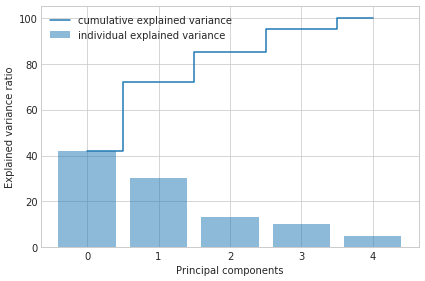

In [87]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(5), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above shows that around 42% of the variance can be explained by the first principal component alone. The second and third principal components still bears some information (around 30% and 17% respectively). Together, the first three principal components contain around 87% of the information. It might be safe to drop the 4th and 5th component.

#### Projection Matrix

Now, we move on to the construction of the projection matrix that will be used to transform our dataset onto the new feature subspace. Projection Matrix is basically a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 5-dimensional feature space to a 3-dimensional feature subspace, by choosing the “top 3” eigenvectors with the highest eigenvalues to construct our 5×3-dimensional eigenvector matrix W.


In [89]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1),
                      eig_pairs[2][1].reshape(5,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.61374669 -0.1086534   0.31453282]
 [-0.6160548  -0.04937871  0.33528021]
 [-0.48988136  0.09412427 -0.84589643]
 [ 0.0603175  -0.6934164  -0.26073877]
 [ 0.01302072 -0.70432273  0.07162964]]


#### Projection onto New Feature Space

In [90]:
Y = X_std.dot(matrix_w)

This new matrix represents our new feature space. 

### PCA in R

Since PCA can only work with numerical values, we restrict our dataset to the five variables that we have been using with PCA so far

#### Scree Plot
<img src = "screeplot.png" height="500" width="500">
This scree plot shows that there is a sharp drop in eigenvalues after 3rd component. Therefore,first three components contribute highly in explaining the variance and hence last two components can be discarded in analysis. So, we proceed with the three components.

#### 3 D Biplot
<img src = "Triplot1.png" height="500" width="500">



#### Loadings
<img src = "pcasummary.png" height="500" width="700">

This biplot gives us an idea of how the input dimensions have a bearing on the principle components that we have identified. It shows:
1. Price, Bedrooms and Accommodates have large negative loadings on component 1.  

2. Among them, accommodations have higher value for component 2 in the absolute terms.  

3. Even though price and bedrooms have higher absolute value for component 3, we still take accommodations as the most important one because component 1 and 2 contribute much higher to the overall variation than the third component.  

#### Scatterplots
<img src = "scatterplot.png" height="700" width="700">
The scatterplot looks as such because some variables are discrete in nature such as bedrooms and accomodates. It also reveals the collinearity between the variables and shows that some pairs such as price-overall_satisfaction and price-reviews have a negative correlation. Many other pairs no visible correlation  such as overall_satisfaction-accomodates.

## K-Mean Clustering
We chose to determine the number of clusters using Elbow Method. For it, the following code is run and the generated graphs are displayed below:

In [91]:
#from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.cluster import KMeans


# k-means cluster analysis for 2-20 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(2,20)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ndf)
    clusassign=model.predict(ndf)
    meandist.append(sum(np.min(cdist(ndf, model.cluster_centers_, 'euclidean'), axis=1))
                    / ndf.shape[0])


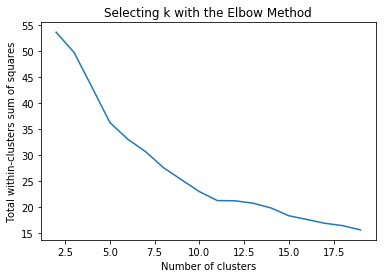

In [32]:
#Plotting average distance from observations from the cluster centroid
#I used the Elbow Method to identify number of clusters to choose
import matplotlib.pyplot as plt
plt.xlabel('Number of clusters')
plt.ylabel('Total within-clusters sum of squares')
plt.title('Selecting k with the Elbow Method')
plt.plot(clusters, meandist)
plt.show()

<img src = "elbowmethod.png" height="500" width="500">

The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation (known as total within-cluster variation or total within-cluster sum of square) is minimized i.e. the total within-cluster sum of square (wss) (that measures the compactness of the clustering) is as small as possible. In Elbow Method, the location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. For our graph, we observe it to be 3. 

In [92]:
#5 clusters solution was interpreted
m=KMeans(n_clusters=3)
m.fit(ndf)
clusassign=m.predict(ndf)

#### Plot for the clustering points in R


<img src = "Rplot.png" height="500" width="500">

# Supervised Learning

## Predictive Analysis using Regression

In this section, we move on to do a formal analysis on our data. Regression Analysis is a commonly used tool to formulate a model to fit our data to determine which among the independent variables are useful in determining dependent variable. For our analysis, the dependent variable will be overall satisfaction, whereas independent variables will be price, bedrooms, accommodates, reviews, room_type and neighborhood. The variables host_id,room_id, longitude, latitude and location are irrelevant to our analysis. So we proceed to make a new data set for our analysis. 

In [5]:
rdf=df[['accommodates','bedrooms','price','reviews','overall_satisfaction','room_type','neighborhood']].copy()

The first step in our analysis will be to change our categorical variables into dummy variabales to make it numerical variable. 

In [6]:
rdf_neighborhood = pd.get_dummies(rdf['neighborhood'])
rdf_roomtype = pd.get_dummies(rdf['room_type'])

In [7]:
rdf_1 = pd.concat([rdf, rdf_neighborhood,rdf_roomtype], axis=1)
rdf_1.head()

,accommodates,bedrooms,price,reviews,overall_satisfaction,room_type,neighborhood,I Municipio,II Municipio,III Municipio,...,XIII Municipio,XIX Municipio,XV Municipio,XVI Municipio,XVII Municipio,XVIII Municipio,XX Municipio,Entire home/apt,Private room,Shared room
0,6,1.0,55.0,0,0.0,Shared room,I Municipio,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,1.0,39.0,10,4.0,Shared room,VI Municipio,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1.0,81.0,0,0.0,Shared room,VI Municipio,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1.0,57.0,1,0.0,Shared room,I Municipio,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1.0,48.0,17,5.0,Shared room,XV Municipio,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Now that we have our dummy variables,theoretically, it is advised to take n-1 variables if there are n categories of a categorical variable. For that reason, we drop the variables "I Municipio " and "Shared room" from our dataset and define them as our base variables, i.e. when all other categories in their variable assume 0, by default, they will be present. We will also drop the variables "room_type" and "neighborhood" now that their dummies are present. 

In [8]:
rdf_2 = rdf_1.drop(['I Municipio', 'Shared room','room_type','neighborhood'], axis=1)
rdf_2.head()

,accommodates,bedrooms,price,reviews,overall_satisfaction,II Municipio,III Municipio,IV Municipio,IX Municipio,V Municipio,...,XII Municipio,XIII Municipio,XIX Municipio,XV Municipio,XVI Municipio,XVII Municipio,XVIII Municipio,XX Municipio,Entire home/apt,Private room
0,6,1.0,55.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,39.0,10,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,81.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1.0,57.0,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1.0,48.0,17,5.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Now we proceed to our analysis with the new dataframe rdf_2 and run simple linear regression on it with y being overall_satisfaction and x being all other variables. 

In [99]:
import statsmodels.api as sm
# Use only one feature
X=rdf_2.loc[:,rdf_2.columns != 'overall_satisfaction']
X = sm.add_constant(X)

In [100]:
y=rdf_2.loc[:,'overall_satisfaction']

#### Regression without splitting the data into training and testing data

In [101]:
reg6 = sm.OLS(y,X).fit()
print(reg6.summary())

                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.280
Model:                              OLS   Adj. R-squared:                  0.280
Method:                   Least Squares   F-statistic:                     2933.
Date:                  Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                          17:41:46   Log-Likelihood:            -3.7824e+05
No. Observations:                180693   AIC:                         7.565e+05
Df Residuals:                    180668   BIC:                         7.568e+05
Df Model:                            24                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.

In [102]:
y_pred6=reg6.predict(X)

In [103]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred6))) 

residuals6 = y-y_pred6
np.sum(residuals6)

Mean Absolute Error: 1.8152957058136552
Mean Squared Error: 3.852342210459744
Root Mean Squared Error: 1.9627384467778033


1.1397105481592007e-09

#### Residual Standard Error (RSE)

RSE is an estimate of the stadard deviation of the error term. This is the error which is inevitable even if the model coefficients are known correctly. The smaller the RSE, the better the model is. The benchmark to comapre this error is the mean of actual values. We find RSE next and compare it with mean. 

In [104]:
y.mean()

2.678421410901363

In [105]:
res2=residuals6**2
RSEd=res2.sum()
RSE=np.sqrt(RSEd)/180693
RSE

0.004617339045678714

In [19]:
0.004617339045678714/2.678421410901363*100

0.1723903127000785

The number 0.17% shows that an error of 0.004617over 2.678 amounts to 0.17% error

It migt be the case that we trained and tested the model on the same dataset, we have a small error. To remove such a possibility, we split our data set into training and testing samples 

In [106]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.280
Model:                              OLS   Adj. R-squared:                  0.280
Method:                   Least Squares   F-statistic:                     2199.
Date:                  Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                          17:42:06   Log-Likelihood:            -2.8370e+05
No. Observations:                135519   AIC:                         5.675e+05
Df Residuals:                    135494   BIC:                         5.677e+05
Df Model:                            24                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.

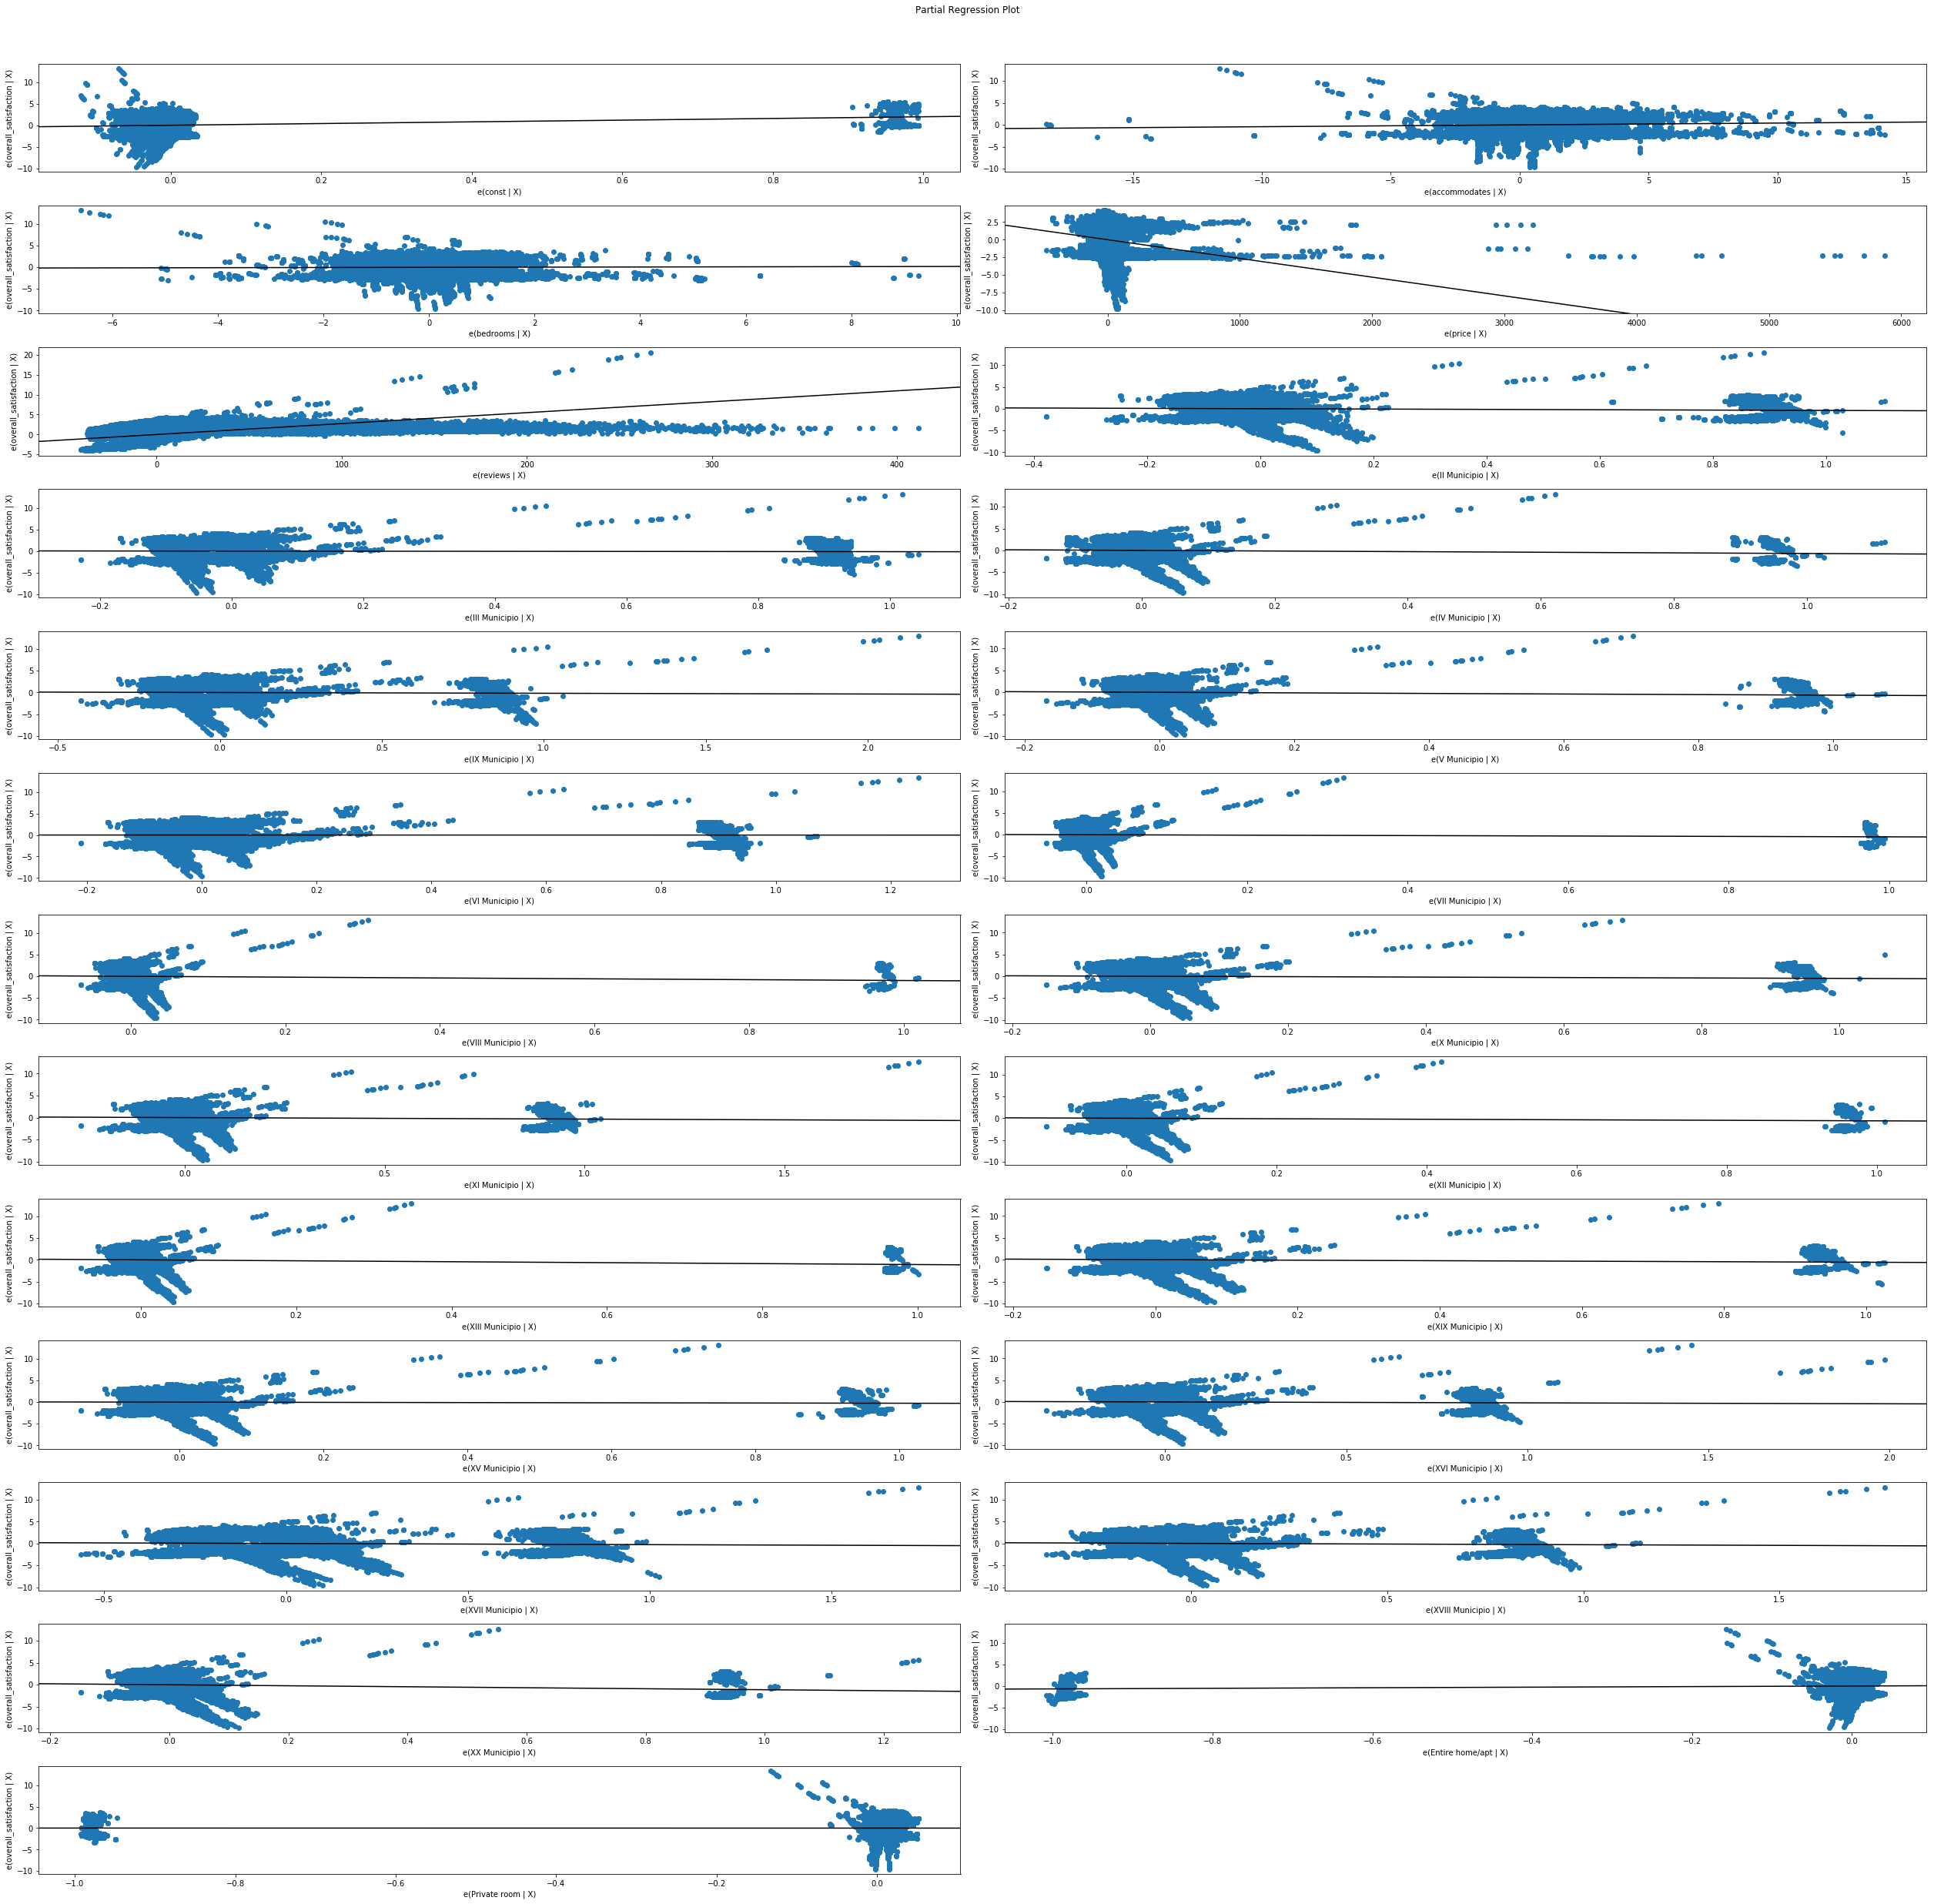

In [107]:
reg0 = sm.OLS(y_train,X_train).fit()
print(reg0.summary())
fig = plt.figure(figsize=(35,35))
fig = sm.graphics.plot_partregress_grid(reg0, fig=fig) 

##### Constant
Our constant is 1.93, which represents that a shared room type airbnb house situated in Municipio I with 0 bedrooms, 0 people accommodated, 0 price and 0 reviews will have 1.93 overall satisfaction on average. Of course, this number has no real life significance.

##### Significance of Variables
From the above output, we see that at 5% significance level, all the variables are significant, having p value less than 0.05, except for the variable Municipio VI and private rooms, which have a very high p-value. Being significant means that all the variables contribute significantly in determining the overall satisfaction score. 

##### Interpretation of Coefficients
The coefficients also agree with our previous analysis:
1. As the price increases, the overall satisfaction decreases by 0.0294 units. 
2. The presence of entire apartment have a positive impact on the overall satisfaction. 
3. The number of bedrooms and people accommodated aparentely have a positive impact on overall satisfaction. 
4. As the number of reviews on an airbnb account increase, the overall satisfaction also increases. 
5. The coefficients related to neighborhood variables indicate that everything else equal, if the neighborhood of a house changes from Municipio I to any other Municipio, the overall satisfaction decreases. 

##### Coefficient of Determination
The $R^2$ and adjusted $R^2$ both are 0.281 which shows that 28.1% of variation in overall satisfaction can be explained using the variables included in our dataset. 

The adjusted $R^2$ is not very high. One justification behind it could be that the overall satisfaction about a rented place is  rather a topic of human behavior and it is highly subjective. There are multiple factors that contribute in determining how much a person will rate an apartmnet, and those factors can include stereotypes, personal experiences, etc. that are not even quantifiable. Hence, adjusted $R^2$ was not expected to be very high to begin with. However, it can be improved by including the data of other factors. Also, low percentage of variance explain could also be an indication that a linear model might not be ideal for predicting overall satisfaction. 

##### F-Test

$ H_o: \beta_i=0$ for i=1,2,3,... 

$ H_1:$ One of the $\beta_i$ 's is not equal to 0 

The F value is really high and the associated probability is approximately 0 which makes us reject the null hypothesis that all the coefficients are 0, so the overall model seems adequate for making the future predictions.

#### Predicting dependent test values with our independent test values

In [108]:
y_pred=reg0.predict(X_test)

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

#### Residual Analysis and Normality plot

((array([-4.16830253, -3.9614719 , -3.84866757, ...,  3.84866757,
          3.9614719 ,  4.16830253]),
  array([-9.94482525, -8.88034118, -8.66896999, ...,  9.3258662 ,
          9.37355207,  9.41064108])),
 (1.8647481977194273, 0.004357469555660082, 0.9504054720063883))

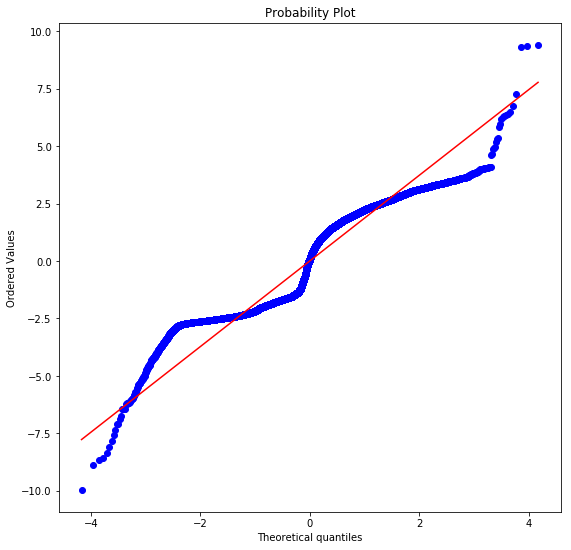

In [109]:
# Actual - prediction = residuals
residuals = y_test-y_pred

plt.figure(figsize=(9,9))
st.probplot(residuals, dist="norm", plot=plt)


When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line.This is an indication that simple straight line might not be sufficient to fully describe the relationship between our variables. 

#### RSE

In [110]:
res0=residuals**2
RSEd=res0.sum()
RSE=np.sqrt(RSEd)/180693
RSE

0.0023076811886976463

In [26]:
y_test.mean()

2.6805795369017575

In [27]:
0.0023030430300273515/2.686490016381104*100

0.08572684119368948

The number 0.0857% shows that an error of 0.002307 over 2.67058 amounts to 0.08% error, which is even better. 

After making model predictions,we use a metric to evaluate how well the model performed. Even though adjusted R-squared is one useful measure, but it only applies to the regression model itself: we'd like some universal evaluation metric that lets us compare the performance of different types of models. Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root mean squared error (RMSE) are common evaluation metrics for predictions involving real numbers.

In [111]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.8163185467503558
Mean Squared Error: 3.8489806617161695
Root Mean Squared Error: 1.961881918392687


In order to improve our model, we try to introduce some quadratic terms in our model. Since the scatter plot for price and overall satisfaction showed a curved pattern, it might be useful to add a squared term of price. 

In [112]:
rdf_2['price2'] = rdf_2.price ** 2
X=rdf_2.loc[:,rdf_2.columns != 'overall_satisfaction']
X = sm.add_constant(X)
y=rdf_2.loc[:,'overall_satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y)
reg1 = sm.OLS(y_train,X_train).fit()
print(reg1.summary())
y_pred1=reg1.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))  


                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.288
Model:                              OLS   Adj. R-squared:                  0.288
Method:                   Least Squares   F-statistic:                     2192.
Date:                  Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                          17:45:48   Log-Likelihood:            -2.8296e+05
No. Observations:                135519   AIC:                         5.660e+05
Df Residuals:                    135493   BIC:                         5.662e+05
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.

We see that in this model that the coefficient for the squared price is significant and the adjusted R^2 has increased and the MAE, MSE, and RMSE are slightly lower than before, which makes it evident that this model is a little better than before.

### Checking for Multicollinearity

We continue to see high condition number which might indicate that there is strong collinearity between our independent variables. We first confirm if the issue exists by finding the eigenvalues of the correlation matrix and see if any of them is close to zero.  We suspect that this problem might be because of our earlier observation that there is significantly high correlation between bedrooms and accommodates. Similarly, accommodates and bedrooms were highly correlated with price because bigger appartments are generally costlier. 

In [50]:
correlations=rdf_2.corr()
eig_vals, eig_vecs = np.linalg.eig(correlations)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[3.11015382 1.79253623 0.01337517 0.17278672 0.22820856 0.40071383
 0.50623246 1.33349313 0.85808462 1.12920042 1.08153529 1.07351393
 0.98487192 1.05408894 1.04515291 1.03842709 1.03392032 1.00577009
 1.00818299 1.01206009 1.01446672 1.01725894 1.01812692 1.02222468
 1.02290759 1.02270659]


We see that there is one eigenvalue 0.01337 which is close to zero so the problem of multicollinearity is present. In order to deal with this problem, let us drop the variable accomodates and bedrooms from our dataset and see if it improves our model

In [51]:
rdf_2.drop(columns=['bedrooms','accommodates'], inplace=True)

In [52]:
correlations=rdf_2.corr()
eig_vals, eig_vecs = np.linalg.eig(correlations)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.29978974 1.74717577 0.01337788 0.21026081 0.40298391 0.50632266
 1.31173501 1.12219378 0.95299016 1.07356923 1.06525772 1.05197077
 1.04077378 1.03635655 1.0317434  1.00422915 1.00743339 1.01011775
 1.01341827 1.02277479 1.02243254 1.01575553 1.01925756 1.01807986]


As we observe that dropping the variables have not affected our model very much, hence the problem still persists. However, we can leave the model as it is, because the problem of multicollinearity does not affect the predicting power of a model if the predictor variables follow the same collinearity pattern in the new data used for prediction.

However, as a whole, we conclude from our analysis that the OLS regression is not the best way to predict the overall satisfaction because firstly, the model assumptions are not completely satisfied and secondly, the prediction power of model is not very strong and hence, we move on to present a new model for prediction of overall satisfaction. 

## Decision Trees (Regression) / Regression Trees

In [115]:
rdf_2 = rdf_1.drop(['I Municipio', 'Shared room','room_type','neighborhood'], axis=1)
rdf_2
# Use only one feature
X=rdf_2.loc[:,rdf_2.columns != 'overall_satisfaction']
X = sm.add_constant(X)
y=rdf_2.loc[:,'overall_satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

y_pred = regressor.predict(X_test) 

final=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
final.head()

,Actual,Predicted
10822,4.5,4.5
20915,4.5,4.5
16633,0.0,0.0
2837,0.0,0.0
555,4.5,5.0


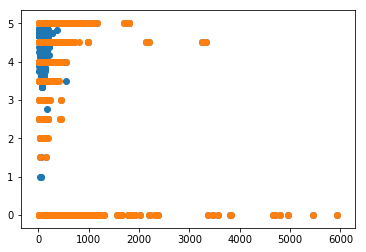

In [116]:
plt.scatter(X_test.loc[:,'price'],y_pred)
plt.scatter(X_test.loc[:,'price'],y_test)
plt.show()

The plot above shows that most of the predictions made by the regression tree are accurate.

In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.12243845691431693
Mean Squared Error: 0.08764636492226952
Root Mean Squared Error: 0.29605128765514516


The above metrics show us that the prediction model of decision tree is far better than linear regression analysis as all the metrics are very low and hence much better than both the regression models constructed above. Hence, we conclude that so far, the regression tree is the best model to predict the overall satisfaction score. 

## Decision Trees (Classification)

It might be of the interest to some parties to figure out the neighborhood or room type of a house given the information of all other attributes. Sometimes, it maybe helpful in making vital decisions. Therefore, we try to apply classification on our data set. 


To begin with, we create a new dataframe with only one categorical variable neighborhood for classifying our data based on the neighborhood. Through this model, given information of all other attributes, an analyst can predict what neighborhood is the airbnb house situated in. 

In [55]:
ddf=df[['accommodates','bedrooms','price','reviews','overall_satisfaction','neighborhood']].copy()

In [56]:
X=ddf.loc[:,ddf.columns != 'neighborhood']
y=ddf['neighborhood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [57]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[12194   362   299    79   639    73   196    17    12    58   158    50
     24   101    99   458  1408   543    62]
 [  893   441    53    26   156    16    58     6    10    29    31    10
      4    34    23    70   207    60    17]
 [  548    66   346    19   121    22    52     8     9    14    38    13
      4    11    16    51   167    54     8]
 [  180    24    21   129    97    13    44    10    11    16    20     7
      3    13    13    26    74    25     5]
 [ 1057   112    99    39   962    39   137    15    15    49    75    32
     12    38    44   114   305   111    27]
 [  243    24    18    14   100   174    38    13    12    12    16     3
      8    13     9    25    64    43     8]
 [  389    60    48    29   192    48   413     9    18    26    44    12
      4    19    24    49   102    47    17]
 [   75     3    11    11    57     4    17    76     3     5    15     1
      1     5     6     6    37    10     3]
 [   87    14    10    12    52     5    25     

From the confusion matrix, you can see that out of 4517 test instances, our algorithm misclassified quite a few values. The accuracy is around 40% which can definitely be improved. 
We try to classify according to room_type next. 

In the next step, we create dataframe with only room_type as categorical variable. Through this model, given information of all other attributes, an analyst can predict what room type is the airbnb house offering. 

In [59]:
ddf_1=df[['accommodates','bedrooms','price','reviews','overall_satisfaction','room_type']].copy()
X=ddf_1.loc[:,ddf_1.columns != 'room_type']
y=ddf_1['room_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[24474  3430     7]
 [ 2961 13970    61]
 [   34   147    90]]
                 precision    recall  f1-score   support

Entire home/apt       0.89      0.88      0.88     27911
   Private room       0.80      0.82      0.81     16992
    Shared room       0.57      0.33      0.42       271

    avg / total       0.85      0.85      0.85     45174



From the confusion matrix, you can see that out of 45174 test instances, our algorithm misclassified only 6849. This is 85% accuracy which is quite impressive. 

# Python Maps

In [61]:
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np
import folium

In [62]:
df2= df[0:199]
df2;

In [63]:
df2.dtypes['room_id']

dtype('int64')

In [64]:
df.columns.get_loc('room_id')

11

In [65]:
#df2['room_id'] = df2['room_id'].astype('str')
#df2.loc[:,'room_id'] = df2.loc['room_id'].apply(str)[16]
df2.room_id = df2.room_id.astype(str)
df2.dtypes

C:\Users\Khowaja\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


accommodates              int64
bedrooms                float64
host_id                   int64
last_modified            object
latitude                float64
location                 object
longitude               float64
neighborhood             object
overall_satisfaction    float64
price                   float64
reviews                   int64
room_id                  object
room_type                object
dtype: object

In [66]:
locations = df2[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[41.899453, 12.502286999999999]

In [67]:
m = folium.Map(location=[41.899453, 12.502286999999999],\
               zoom_start=16)
m

In [68]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df2['room_id'][point]).add_to(m)
m

Many times, we see filter options on Airbnb website which let customers put restrictions on the features to find their desired house easily. Airbnb also has a map which shows the location of the houses that agree with all the filters that user has defined. We do a similar, but simpler work next:

In [69]:
#To extract houses in Municipio I only:
m1=df['neighborhood'] == 'I Municipio'
#To extract houses having price of one night between 0-30$
price30= df['price'] <30
#Combining the two
filtered=df[m1 & price30]
filtered['price'] = filtered['price'].astype('str')
#to reduce our sample
filtered=filtered[0:199]

#reindexing our new dataset
filtered = filtered.reset_index()
#deleting older index
del filtered['index']
filtered.head()

C:\Users\Khowaja\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,accommodates,bedrooms,host_id,last_modified,latitude,location,longitude,neighborhood,overall_satisfaction,price,reviews,room_id,room_type
0,1,1.0,46827867,2017-01-17 09:13:30.643322,41.898600,0,12.496792,I Municipio,5.0,18.0,61,11333071,Shared room
1,1,1.0,1209540,2017-01-17 09:13:30.635964,41.898077,0,12.501230,I Municipio,3.5,23.0,5,9111610,Shared room
2,8,1.0,64310283,2017-01-17 09:13:29.079022,41.893190,0,12.510545,I Municipio,4.0,28.0,7,12798678,Shared room
3,6,1.0,4064206,2017-01-17 09:13:27.633466,41.899891,0,12.502315,I Municipio,4.0,20.0,97,1286735,Shared room
4,8,1.0,64310283,2017-01-17 09:13:27.630427,41.894948,0,12.510402,I Municipio,3.5,28.0,10,12019973,Shared room


In [70]:
#Plotting the filtered results
new = filtered[['latitude', 'longitude']]
newlist = new.values.tolist()
map = folium.Map(location=[41.898600, 12.496792],\
               zoom_start=16)


In [71]:
len(newlist)

199

In [72]:
for point in range(0,len(newlist)):
    folium.Marker(newlist[point], popup=filtered['price'][point]).add_to(map)
map